**Machine Learning Handson (ML_Day1)**

_This notebook contains all the sample code for ML workshop Day 1(ML)._

Topics coverd: Leasrnig with Prototype, Nearest Neibour, KNN, KNN Regression, MNIST data classification using SGD and classifier, confusion matrix, precision recall, KNN multiclass classifier, multibalble classification_

_Linear Regression, Normal Equation, Gradient Descent, 
SGD, Ploynomial Regression, Learning Curve: underfit Overfit, Lasso Ridge,Decision Tree_

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures.

In [1]:
import sklearn
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Machine_Learning_Day1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# CAT vs DOG classification 
## Learning with Prototype (Mean or average)
## K Nearest Classifier


Data download and reading 

unzip data to root folder

website link : #https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

total  25000 images each of 12500 images for cats and dogs


In [2]:
# Necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# !pip install imutils # install this packages
from imutils import paths
import numpy as np
import cv2
import os

In [3]:
# Folder for cat and dog
cat_folder_path= 'C:/Users/aminur/Downloads/kagglecatsanddogs_5340/PetImages/Cat/'
dog_folder_path= 'C:/Users/aminur/Downloads/kagglecatsanddogs_5340/PetImages/Dog/'
dog=1 # label
cat=0 # label
import glob

In [4]:
# Image feature creation function
size = (32, 32)
def createImageFeatures(image, size=(32, 32)):
    # resize the image
    image = cv2.resize(image, size)
    # flatten the image
    pixel_list = image.flatten()
    return pixel_list

print("Reading all images")
image_paths_dog = list(glob.glob(dog_folder_path+'/*'))
image_paths_cat = list(glob.glob(cat_folder_path+'/*'))


Reading all images


In [5]:
# read dog images 
raw_images = []
labels = []
from PIL import Image
import numpy as np
# loop over the input images
for (i, image_path) in enumerate(image_paths_dog[0:5000]):
#     image = cv2.imread(image_path.replace("/","//"))
    try:
        image = Image.open(image_path).convert('L')
        image = np.asarray(image)
        pixels = createImageFeatures(image, size=size)
        raw_images.append(pixels)
        labels.append(dog)
    except:
        pass


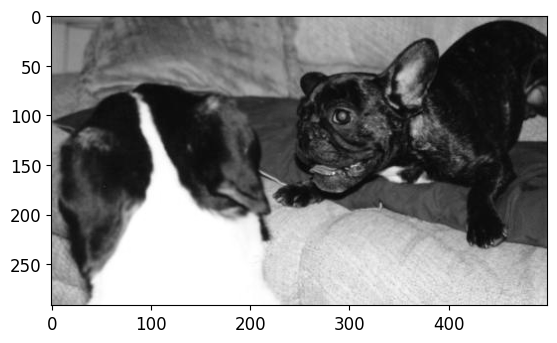

In [6]:
#showing sample image dog
plt.imshow(image,'gray')

In [7]:
#read cat images
from PIL import Image
import numpy as np
# loop over the input images
for (i, image_path) in enumerate(image_paths_cat[0:5000]):
    try:
        image = Image.open(image_path).convert('L')
        image = np.asarray(image)
        pixels = createImageFeatures(image)
        raw_images.append(pixels)
        labels.append(cat)
    except:
        pass
        


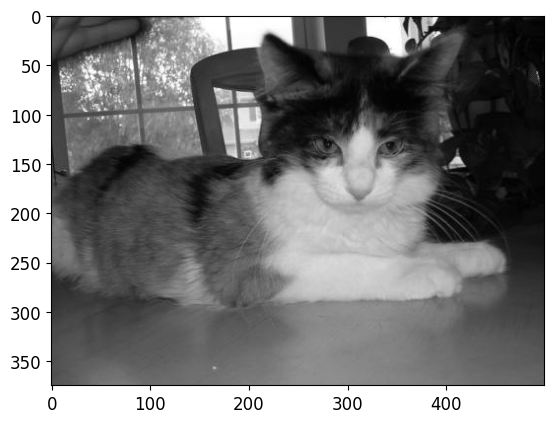

In [8]:
#showing sample image cat
plt.imshow(image,'gray')

In [9]:
len(raw_images)

9999

In [10]:
len(labels)

9999

In [11]:
raw_images = np.array(raw_images)
raw_images = raw_images # data scalling
labels = np.array(labels)

In [12]:

(train_X, test_X, train_y, test_y) = train_test_split(
    raw_images, labels, test_size=0.25, random_state=0)

## Learnig With Prototype, mean

In [13]:
dog_mean = train_X[train_y==1].mean(axis=0)

In [14]:
cat_mean = train_X[train_y==0].mean(axis=0)

In [15]:
lwp_predicts = []
for d in test_X:
    if np.linalg.norm(d-dog_mean)<np.linalg.norm(d-cat_mean):
        lwp_predicts.append(dog)
    else:
        lwp_predicts.append(cat)

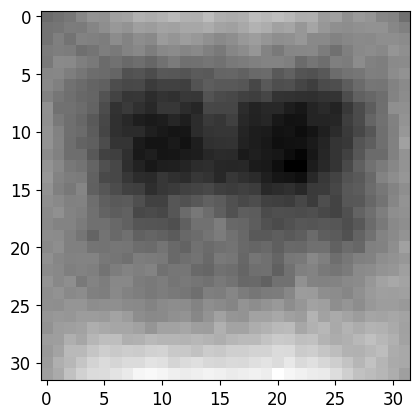

In [16]:
from matplotlib import pyplot as plt
plt.imshow(dog_mean.reshape(size),'gray')

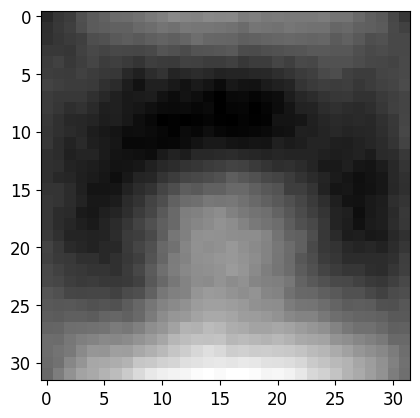

In [17]:
from matplotlib import pyplot as plt
plt.imshow(cat_mean.reshape(size),'gray')

In [18]:
test_y

array([0, 1, 1, ..., 1, 1, 1])

In [19]:
 from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(lwp_predicts, test_y)

0.5492

## K Nearest Neibour Classifier for same data


In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
acc = model.score(test_X, test_y)
print("Model accuracy: {:.2f}%".format(acc * 100))

Model accuracy: 55.44%


In [22]:
# model can be predict for new data
model.predict([test_X[2,:]])

array([0])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, train_X, train_y, cv=3, scoring="accuracy")

array([0.5532    , 0.554     , 0.54341737])

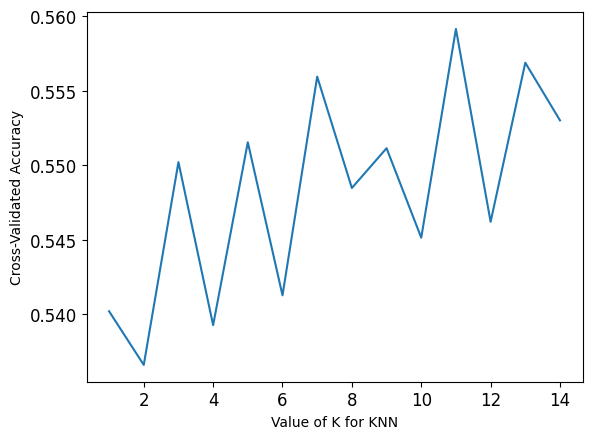

In [24]:
import matplotlib.pyplot as plt 
# choose k between 1 to 15
k_range = range(1, 15)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


Irsh dataset classification with CV

In [25]:
# We are going to use the famous dataset 'iris' with the KNN Classifier
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
# load dataset
iris = load_iris()
X = iris.data
y = iris.target
# split into test and train dataset, and use random_state=48
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)
# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
# train the model
knn.fit(X_train, y_train)
# get the predict value from X_test
y_pred = knn.predict(X_test)
# print the score
print('accuracy: ', knn.score(X_test, y_test))
# accuracy:  0.973684210526

accuracy:  0.9473684210526315


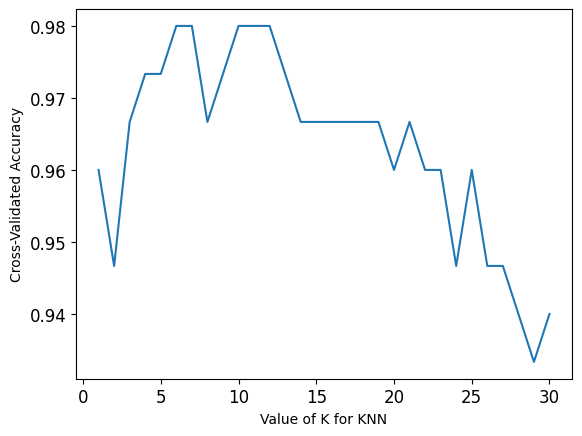

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


## KNN regression with uniform and distance weights

In [27]:
#KNN can also be used for regression task as example
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

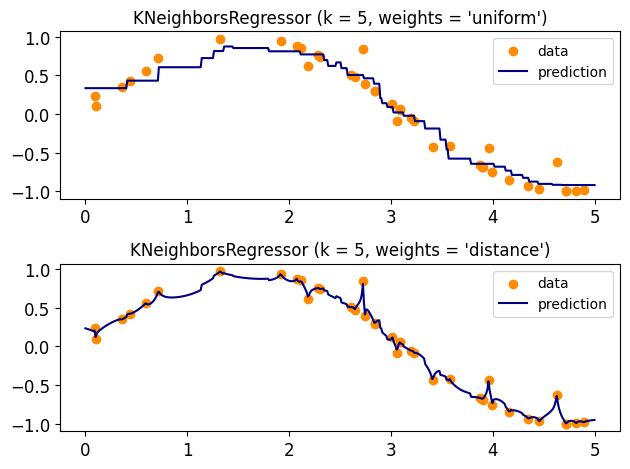

In [28]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()


# MNIST Data Classification

In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

C:\Users\aminur\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
28 * 28

784

Saving figure some_digit_plot


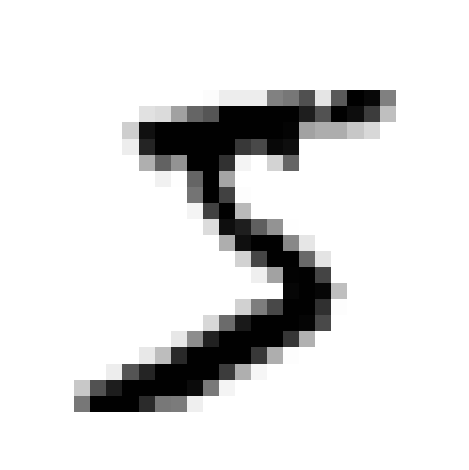

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [34]:
y[0]

'5'

In [35]:
y = y.astype(np.uint8)

In [36]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [37]:
# For ploting purpuse
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


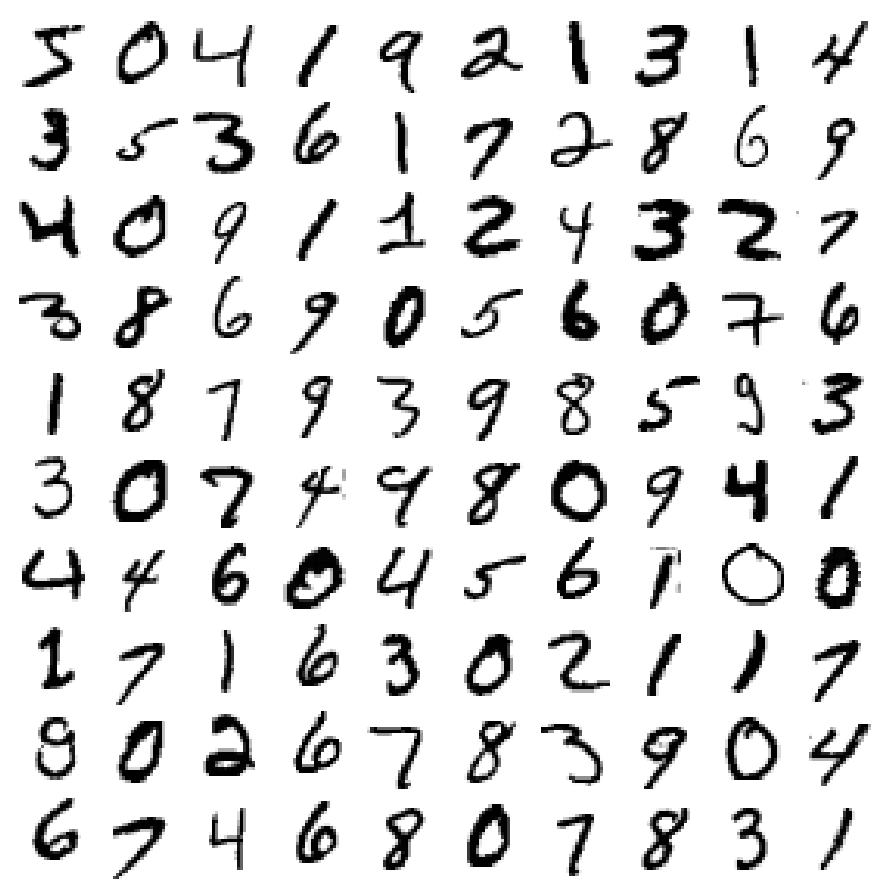

In [38]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [39]:
y[0]

5

In [40]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [41]:
X_train.shape

(60000, 784)

## Training a Binary Classifier

In [42]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [44]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy Using Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at
the confusion matrix. The general idea is to count the number of times
instances of class A are classified as class B

In [46]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [48]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [49]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [50]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [51]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [52]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [53]:
#The F score is the harmonic mean of precision and recall
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## KNN classifier : Multiclass

In [54]:
#super vised and unsuper
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [55]:
knn_clf.predict(X_test[0:1,:])

array([7], dtype=uint8)

In [56]:
knn_clf.predict_proba(X_test[0:1,:])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [57]:
y_knn_pred = knn_clf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

## Multilabel Classification

In [59]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [60]:
knn_clf.predict([some_digit])

array([[False,  True]])

# Decision Tree

## Training and Visualizing a Decision Tree


In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

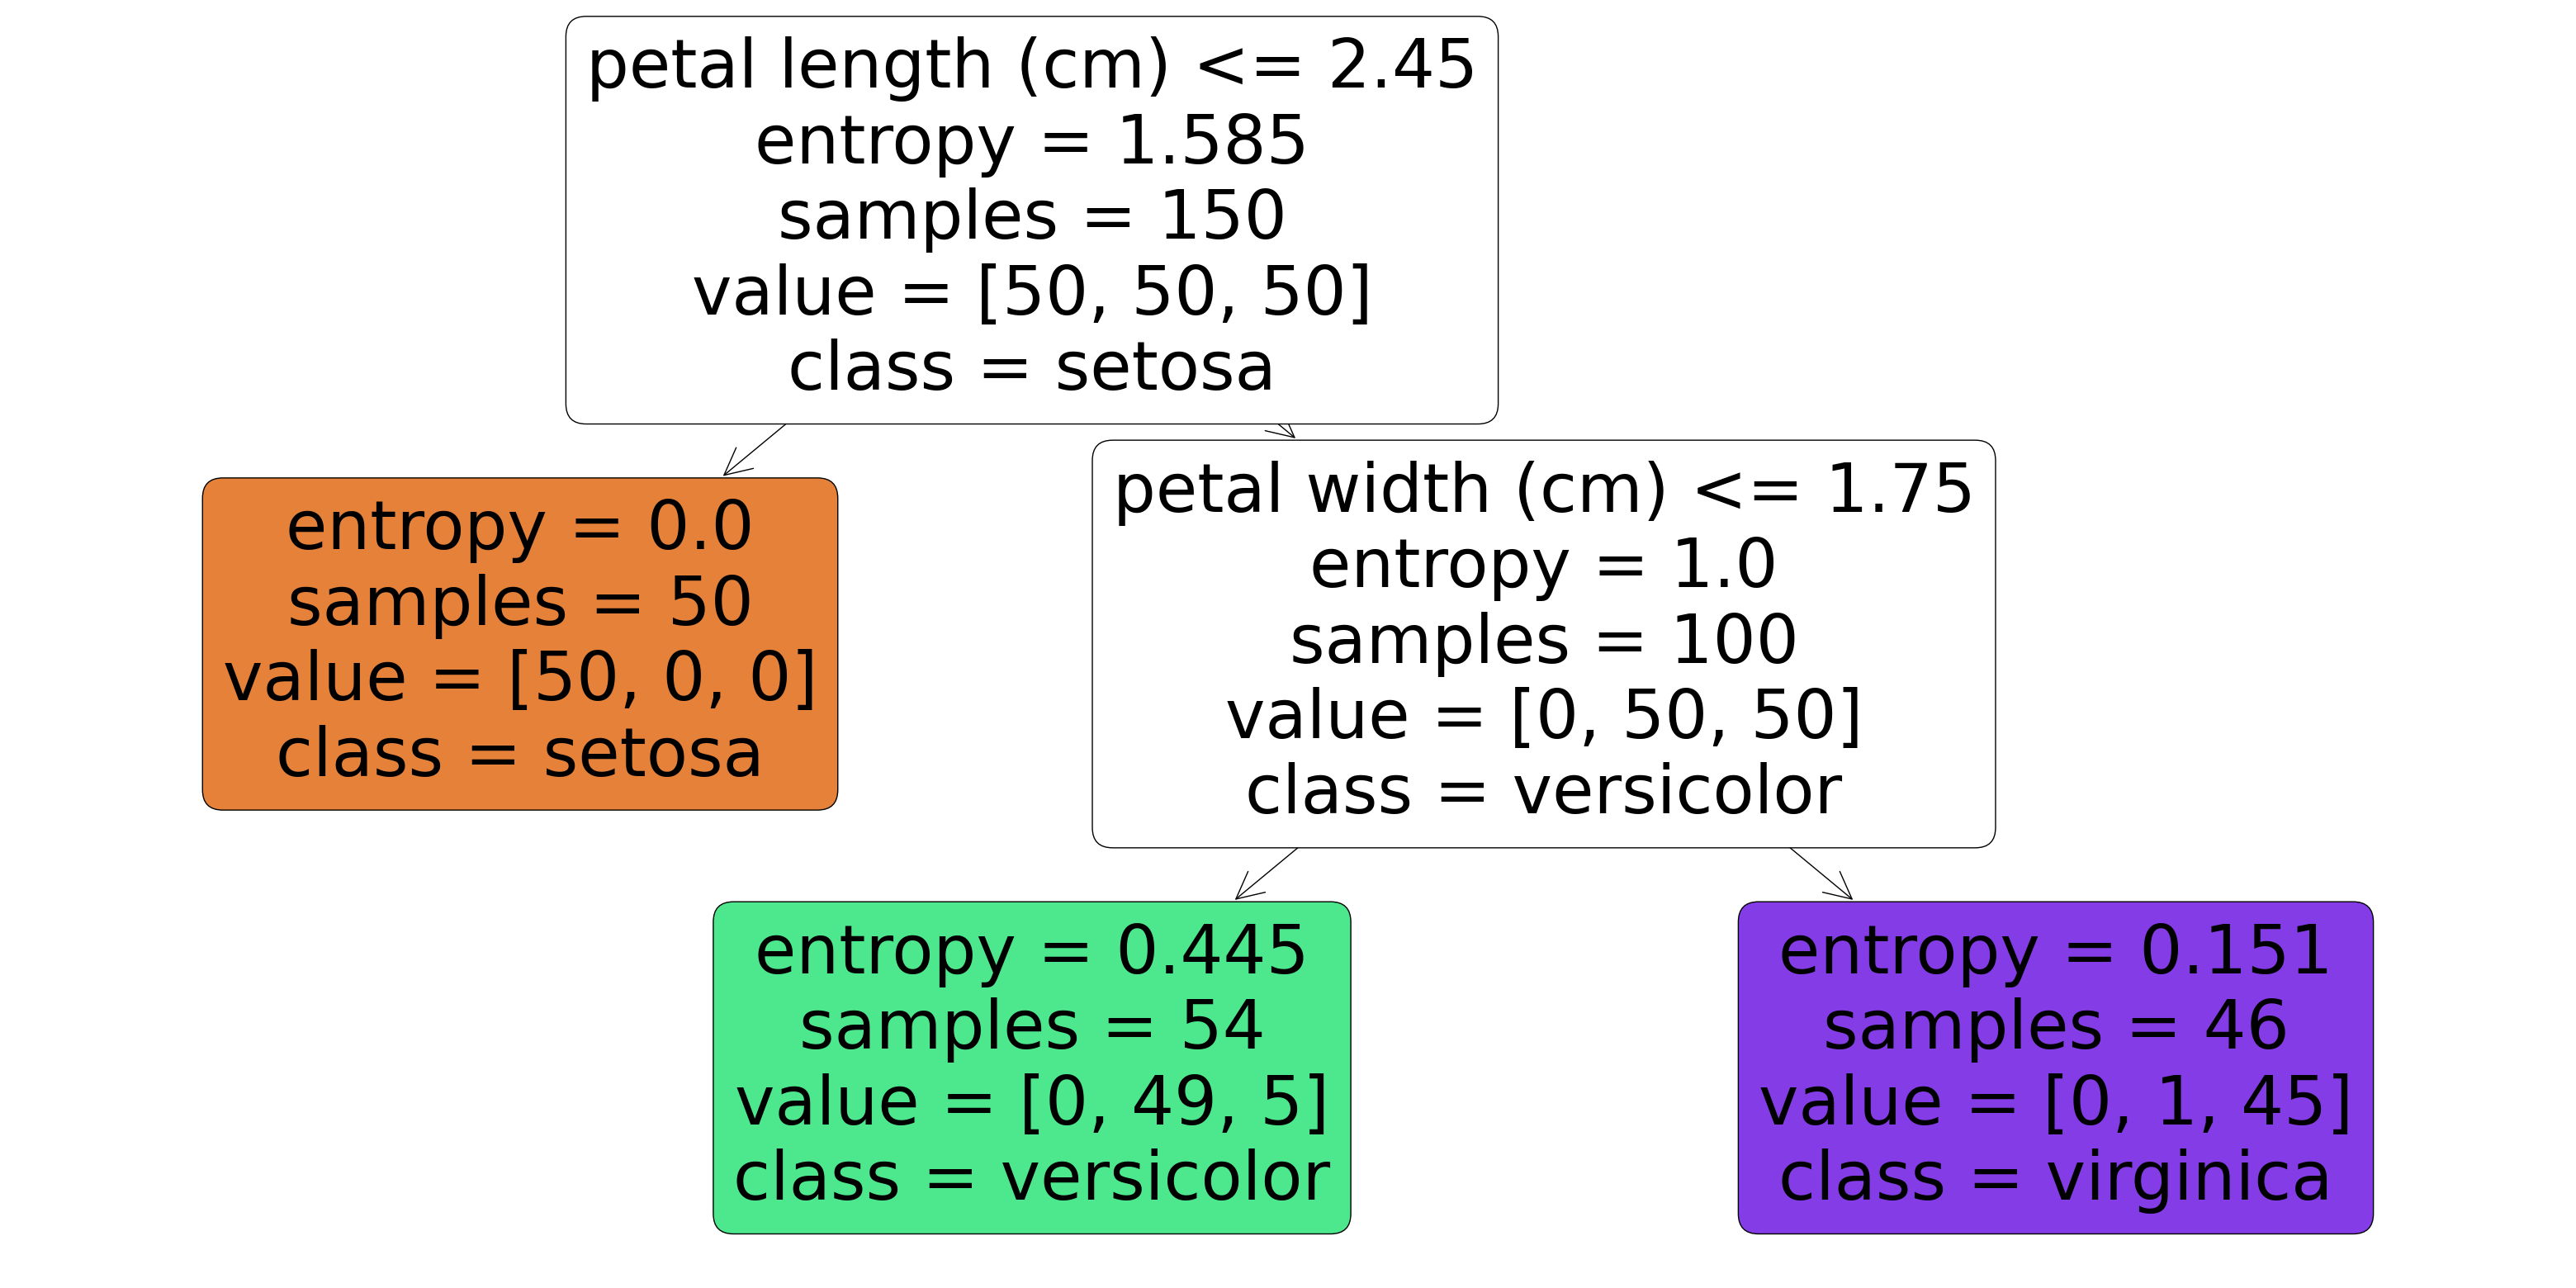

In [62]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_clf, feature_names = iris.feature_names[2:], class_names=iris.target_names, filled=True, rounded=True,)
plt.show()

## Estimating Class Probabilities


In [63]:
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [64]:
tree_clf.predict([[5, 1.5]])


array([1])

Saving figure decision_tree_decision_boundaries_plot


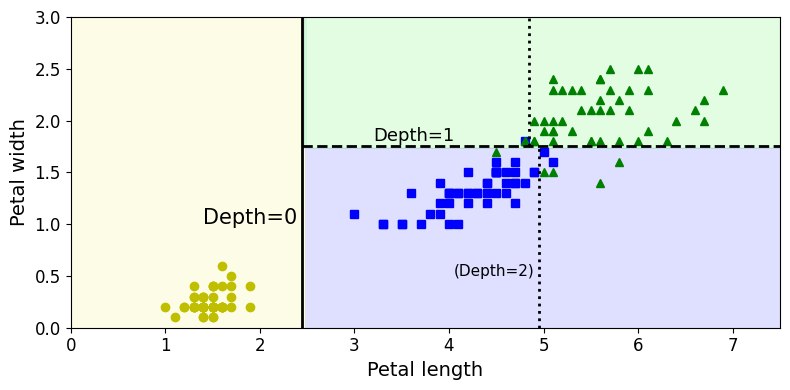

In [65]:
#for ploting purpose only
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

## Decision Tree: Regression

In [66]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Saving figure tree_regression_plot


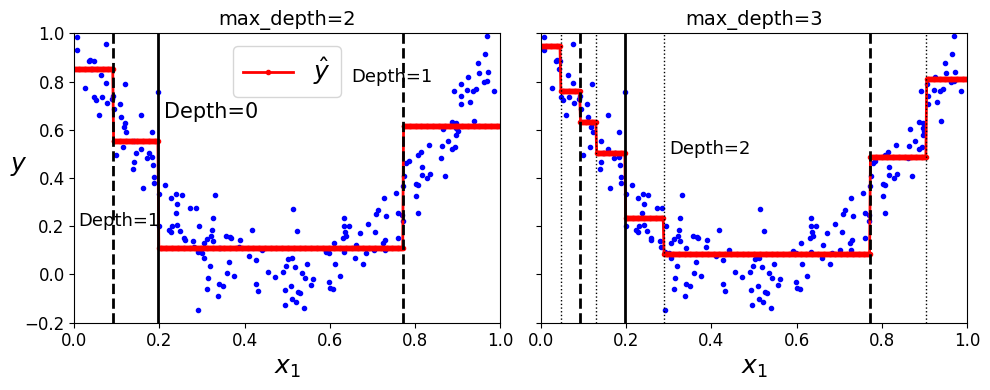

In [68]:
# for ploting and explanation purpose
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()


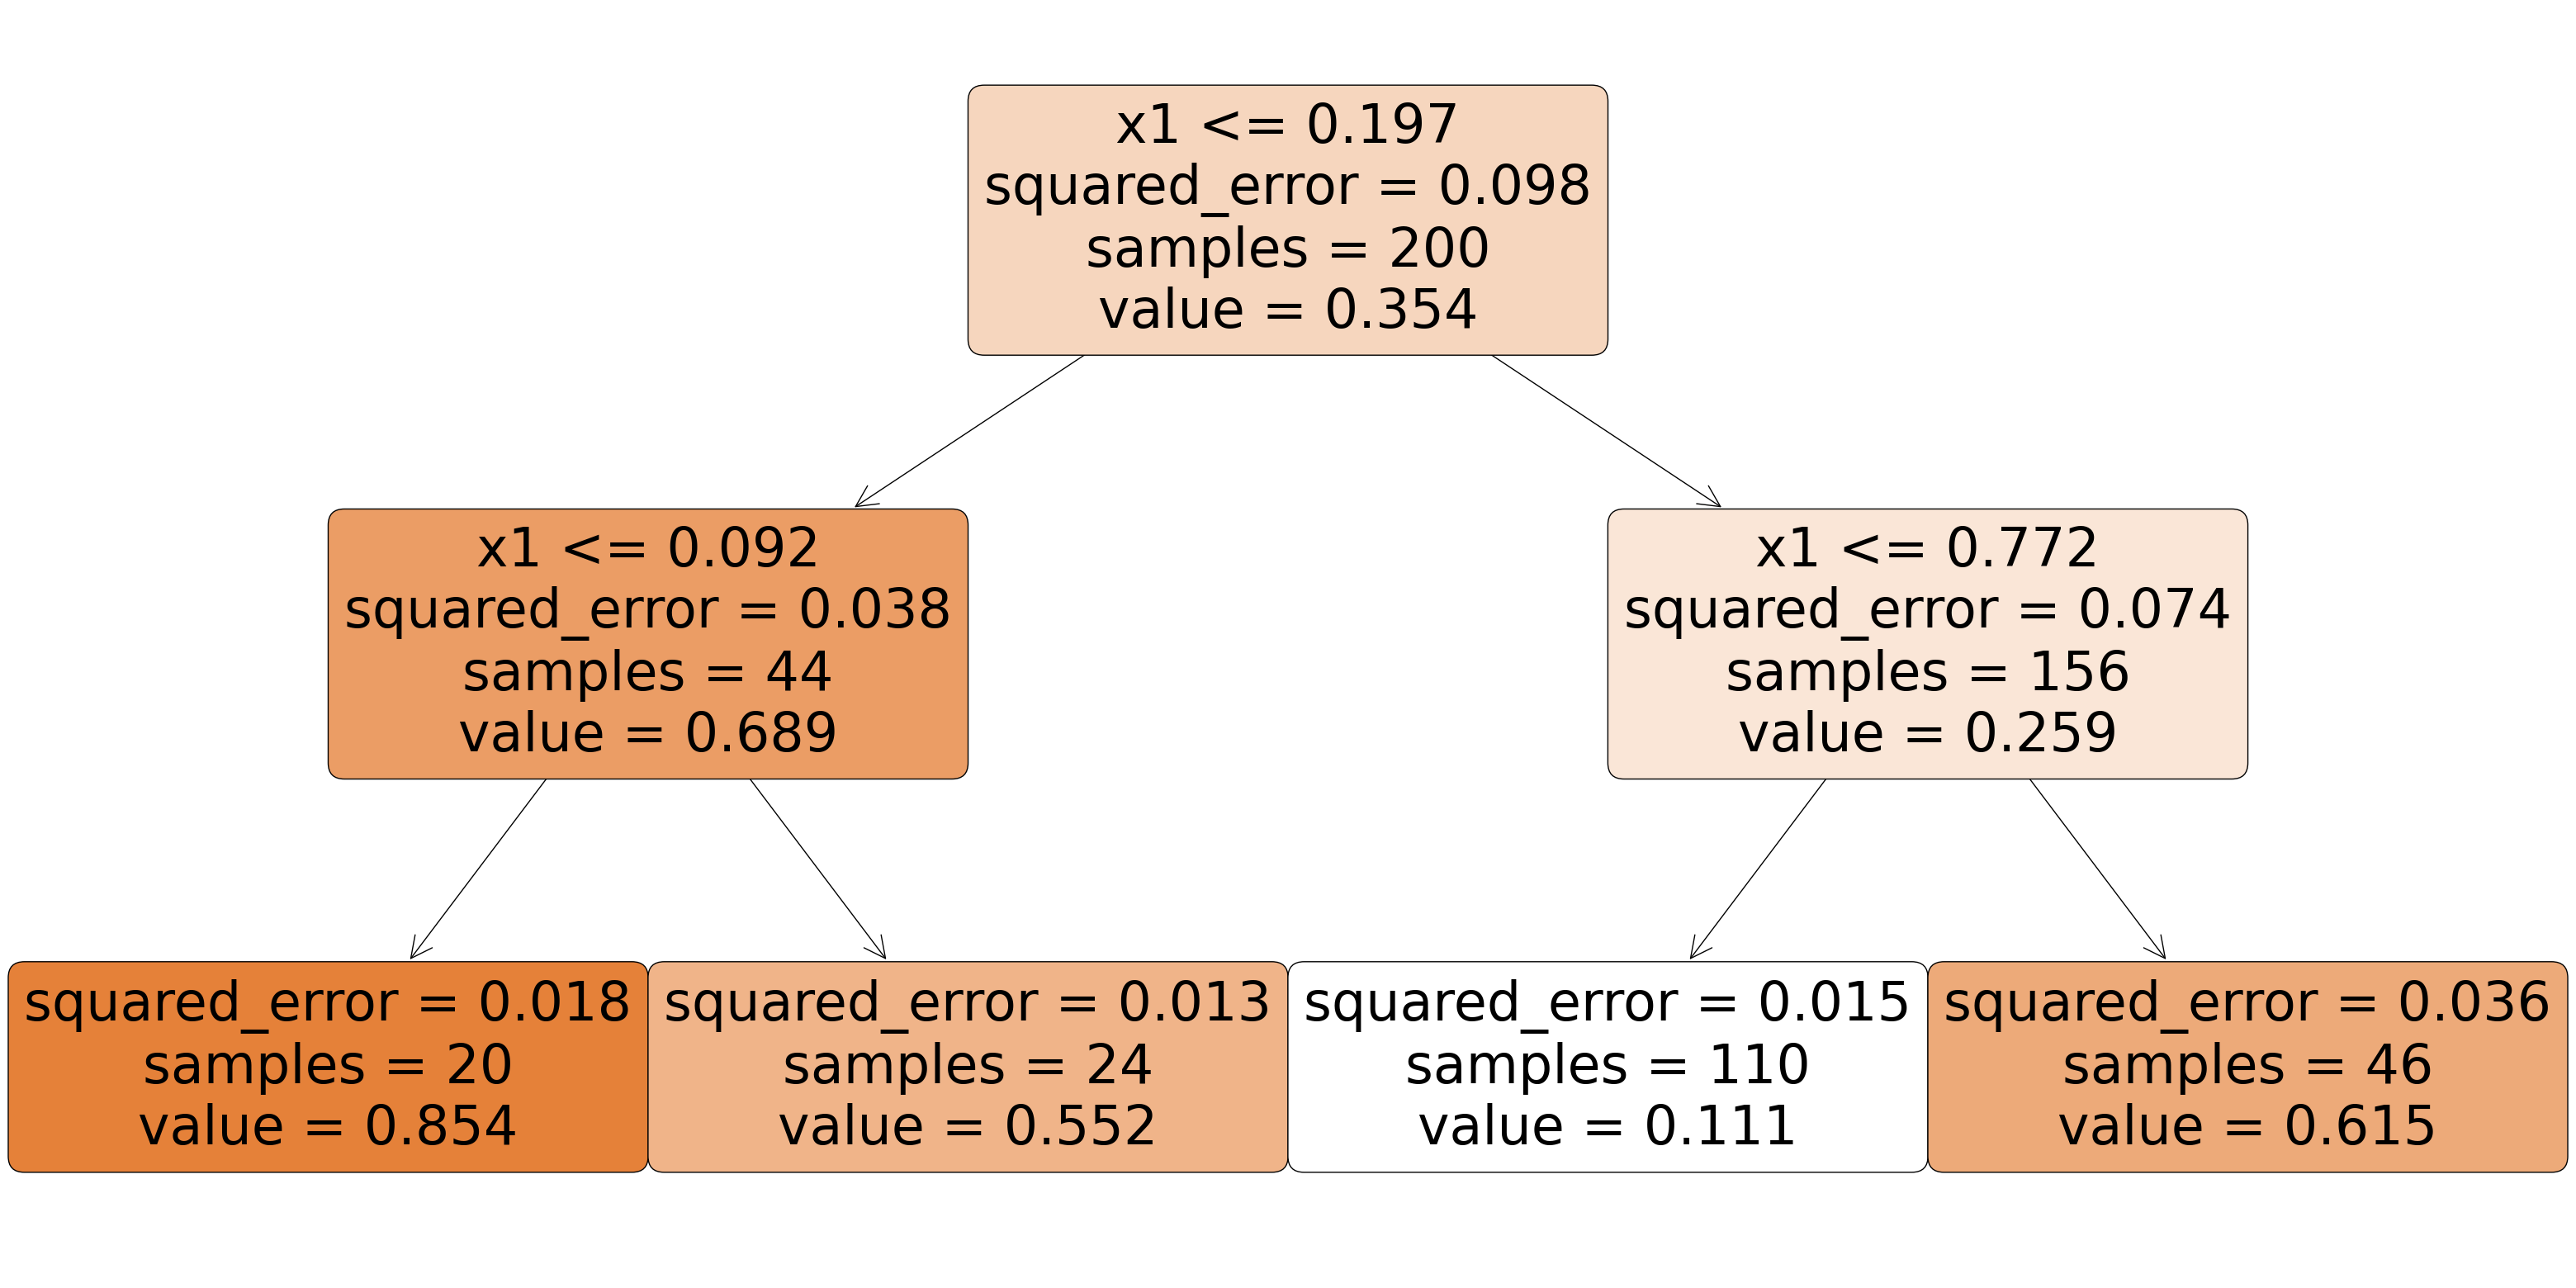

In [69]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_reg1, feature_names=["x1"],rounded=True, filled=True)
plt.show()

#Linear Regression



## The Normal Equation

Use this random genrated datasets


Linear Regression model prediction

 $y = \theta_0 +\theta_1x_1+ \theta_2x_2+...+\theta_nx_n$

 Normal Equation:

$\hatθ = {({X}^TX)}^{-1}{X}^Ty$



1) Plot data for visulization

2) Solve Theta using normal equation with numpy inv and scipy.linalg.lstsq
The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:


This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:


In [70]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


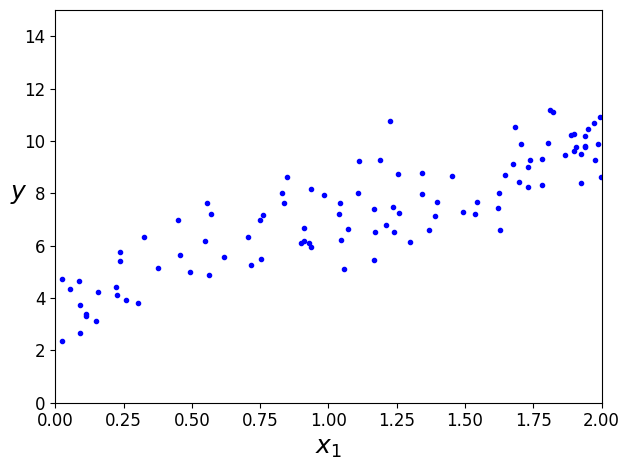

In [71]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [72]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [73]:
X_b.shape

(100, 2)

In [74]:
theta_best

array([[3.94132542],
       [2.99316875]])

In [75]:
#Make prediction for output model

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.94132542],
       [9.92766291]])

Saving figure linear_model_predictions_plot


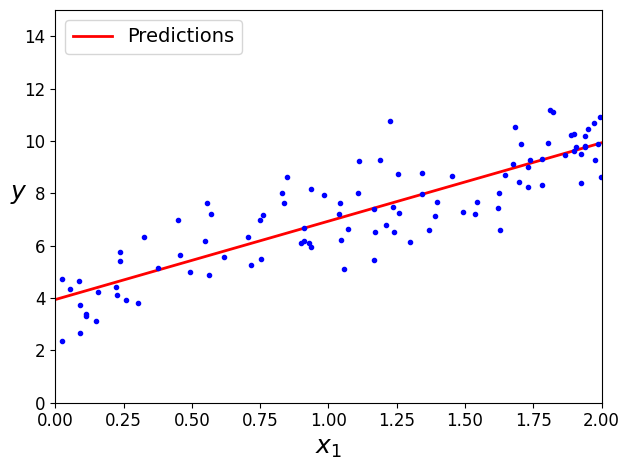

In [76]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94132542]), array([[2.99316875]]))

In [78]:
lin_reg.predict(X_new)

array([[3.94132542],
       [9.92766291]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [79]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.94132542],
       [2.99316875]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [80]:
np.linalg.pinv(X_b).dot(y)

array([[3.94132542],
       [2.99316875]])

# Gradient Descent
## Batch Gradient Descent

In [81]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [82]:
theta

array([[3.94132542],
       [2.99316875]])

In [83]:
X_new_b.dot(theta)

array([[3.94132542],
       [9.92766291]])

In [84]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


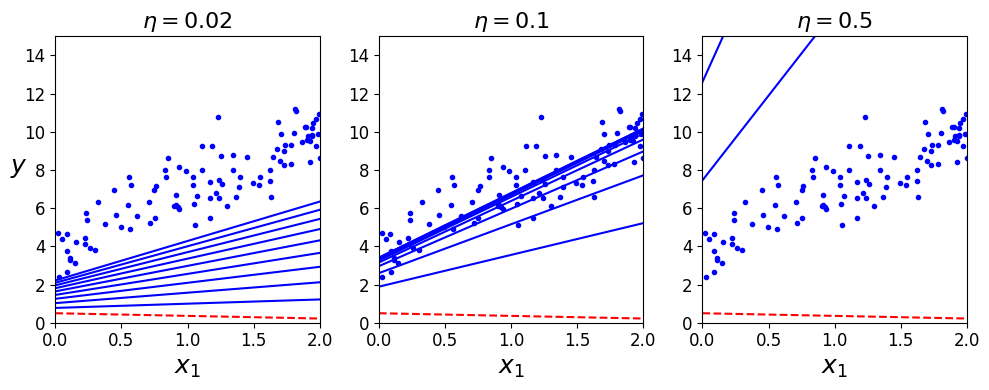

In [85]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

In [86]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [87]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89834205]), array([2.98777677]))

# Polynomial Regression

In [88]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [89]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


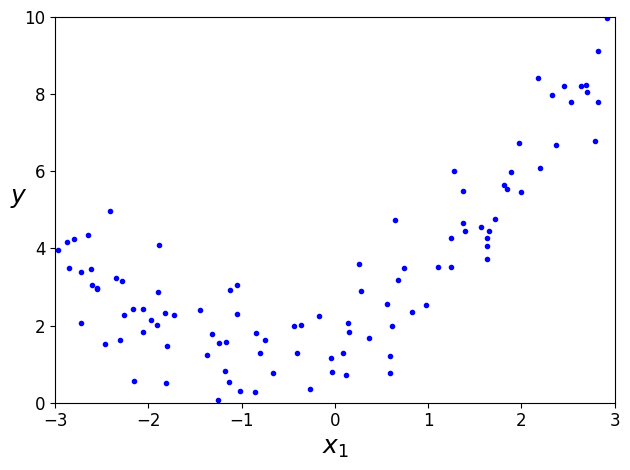

In [90]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [92]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
#TODO : 2deg

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


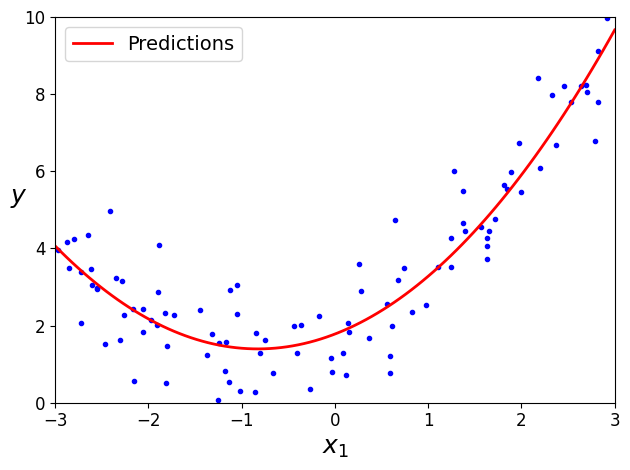

In [94]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


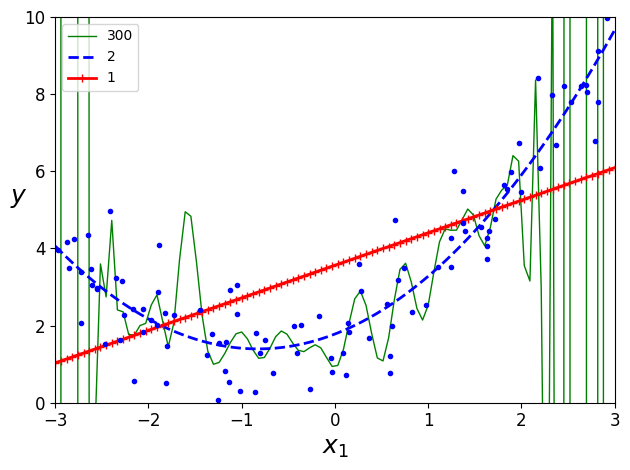

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

# Learning Curves: Underfit and Overfit

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Saving figure underfitting_learning_curves_plot


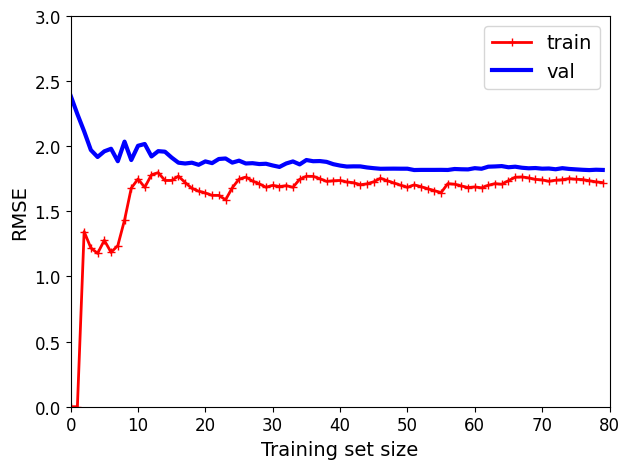

In [97]:
#Underfit prblem showing
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")  
plt.show()                                      

Saving figure learning_curves_plot


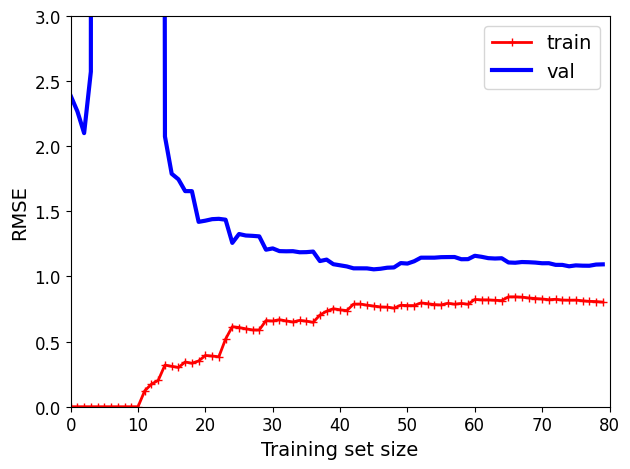

In [98]:
#overfit problem: under and over fitting concept
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
save_fig("learning_curves_plot")  
plt.show()                        

# Regularized Linear Models

 to reduce overfitting is to
regularize the model (i.e., to constrain it)

## Ridge Regression

In [99]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [100]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [101]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

Saving figure ridge_regression_plot


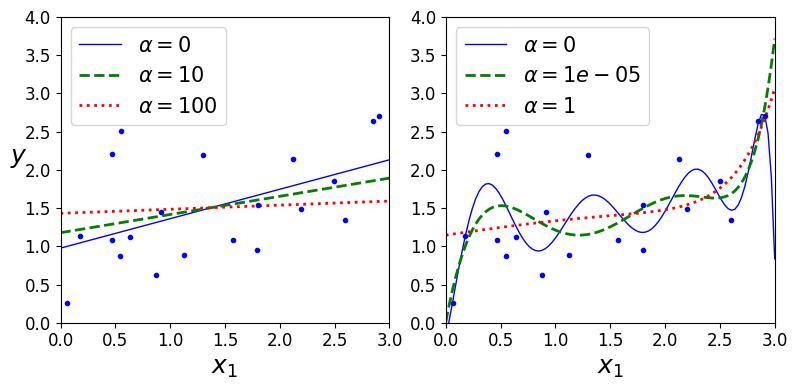

In [102]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [103]:
# sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
# sgd_reg.fit(X, y.ravel())
# sgd_reg.predict([[1.5]])

## Lasso Regression

C:\Users\aminur\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


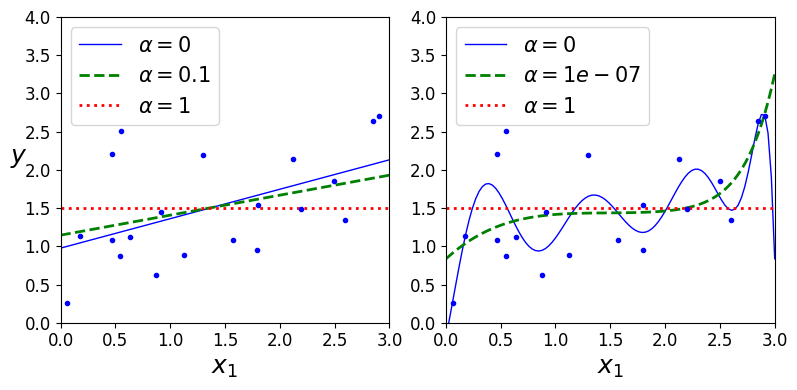

In [104]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [105]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso
Regression. The regularization term is a simple mix of both Ridge and
Lasso’s regularization terms, and you can control the mix ratio r. When r =
0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is
equivalent to Lasso Regression

In [106]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Bayesian Learning

# Maximum Likelyhood Estimation(MLE)

Assume we have some `(*fake*)` data based on the preceived `IQ` for people who vote for a particular president

Text(0.5, 1.0, 'Fake IQ Data (Log Transformed)')

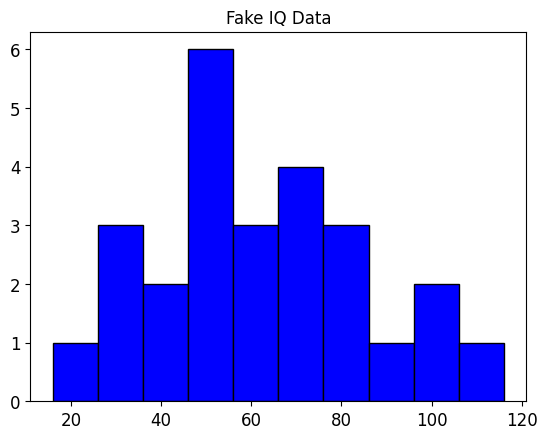

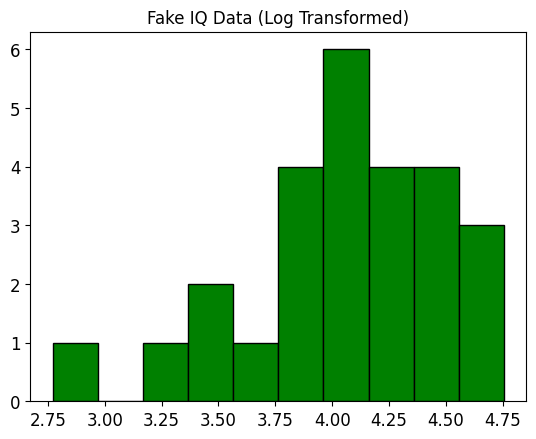

In [107]:
# Histogram with density plot
# !pip install seaborn

import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



fake_data=[30,40,62,61,85,80,16,55,26,53,51,70,116,
           66,51,101,99,88,71,55,51,35,62,71,81,44]


plt.hist(fake_data, color = 'blue', edgecolor = 'black')
plt.title('Fake IQ Data')
plt.subplots()

plt.hist(np.log(fake_data), color = 'green', edgecolor = 'black')
plt.title('Fake IQ Data (Log Transformed)')


## MLE estimation
transform data and looks close
+ `Well, lets consider that maybe we think these data reflect a normal distribution.`

    
**`For simplicity we are assuming Normal distribution`**:

<font size=4>$f(x_1,x_2,x_3...x_n ; \mu,\sigma) = $</font>

**`Replace with distribution:`**

<font size=4>$P(X;\mu,\sigma)= \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x-\mu)^2}{2\sigma^2}) =$</font>

<font size=4>$\prod  \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x-\mu)^2}{2\sigma^2}) =$</font>


**`Expand:`**

<font size=3>$ \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_1-\mu)^2}{2\sigma^2})* \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_2-\mu)^2}{2\sigma^2})* \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_3-\mu)^2}{2\sigma^2})*... \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_n-\mu)^2}{2\sigma^2}) =$</font>


**`Now take the Log:`**

<font size=2.8>$ln(L(\theta;X))=ln(\frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_1-\mu)^2}{2\sigma^2}))+ ln(\frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_2-\mu)^2}{2\sigma^2}))+ ln(\frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_3-\mu)^2}{2\sigma^2}))+... ln(\frac{1}{\sigma \sqrt(2\pi)} exp (-\frac{(x_n-\mu)^2}{2\sigma^2}))$</font>


**`Simplify`:**

<font size=3>$ln(L(\theta;X))=ln(\frac{1}{\sigma \sqrt(2\pi)})+ln(exp(-\frac{(x_1-\mu)^2}{2\sigma^2})$</font>, this is done for each x_i so I will simplify:

<font size=4>$=\frac{-1}{2}ln(2\sigma\pi)-\frac{(x_1-\mu)^2}{2\sigma^2}$</font>

<font size=4>$=\frac{-1}{2}ln(2\pi)-\frac{1}{2}ln(\sigma)-\frac{(x_1-\mu)^2}{2\sigma^2}$</font>, Now repeat for a X=[x_1,x_2...x_n]

To speed this up and understand that we have: (n) observations (data points)

<font size=4>$=\frac{-n}{2}ln(2\pi)-n*ln(\sigma)-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$</font> *`This is what we will take the derivative of`*


**`Now the Derivatives`:**

The first derivative will be the slope of the log-likelihood curve:

<font size=4>$\frac{\partial L}{\partial \mu}=0-0-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2=$</font>

<font size=4>$\frac{1}{\sigma^2}\sum_{i=1}^{n} x_i-\mu=$</font>

<font size=4>$\frac{1}{\sigma^2}\sum_{i=1}^{n} x_i-n\mu$</font>

<font size=4>$\hat\mu=\frac{\sum_{i=1}^{n} x_i}{n} = $</font>sample mean


`---------Now Standard Deviation-----------`

short cut:


<font size=4>$=\frac{-n}{2}ln(2\pi)-n*ln(\sigma)-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$</font>

<font size=4>$\frac{\partial L}{\partial \sigma}=0-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2=$</font>, set equal to zero

<font size=4>$-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2=0$</font>


**`Manipulate:`**

<font size=4>$\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2=\frac{n}{\sigma}$</font>


<font size=4.9>$\hat\sigma=\sqrt\frac{\sum_{i=1}^n(x_i-\mu)^2=\frac{n}{\sigma}}{n}$</font>, biased estimator




62.30769230769231 23.57601328398981


C:\Users\aminur\AppData\Local\Temp\ipykernel_7552\3507745266.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(np.mean(fake_data),np.std(fake_data),1000))
C:\Users\aminur\AppData\Local\Temp\ipykernel_7552\3507745266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fake_data

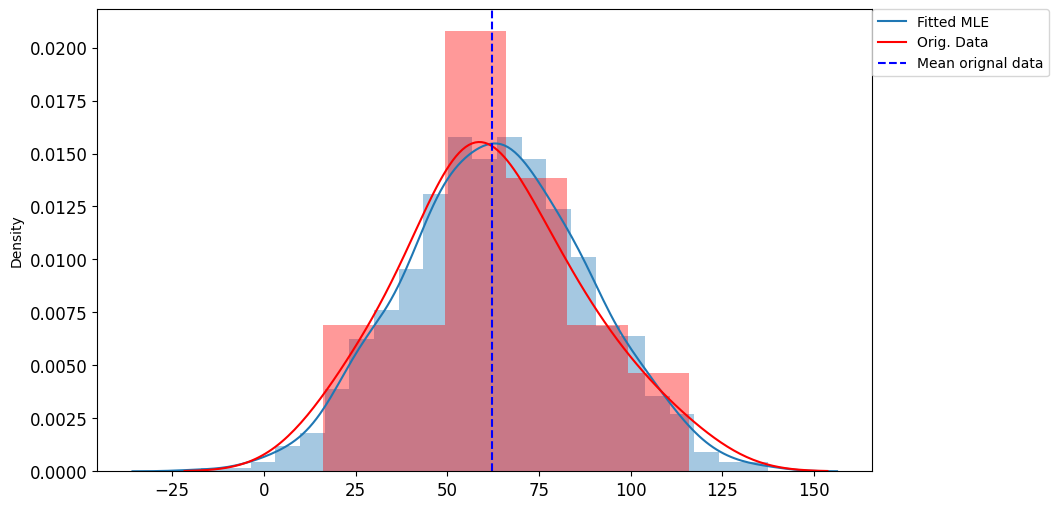

In [108]:
print(np.mean(fake_data),np.std(fake_data))
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(np.random.normal(np.mean(fake_data),np.std(fake_data),1000))

sns.distplot(fake_data,color='red')
plt.axvline(np.mean(fake_data),color='b', linestyle='--')
plt.legend(['Fitted MLE','Orig. Data', 'Mean orignal data'],bbox_to_anchor=(1, 1),
           loc=2, borderaxespad=0.) #,fontsize=25
plt.show()


# Naive Bayes Classifier

There are three types of Naive Bayes Model

**Multinomial**

You apply multinomial when the features or variable (Categorical or Continuous) have discrete frequency counts. For example, you want to classify as spam or not, then you will use word counts in the body of the mail.

**Bernoulli**

It is good to apply when you have a dataset have binary features. And Making prediction from the binary features. For example, a buyer will buy the house or not.

**Gaussian**

If the dataset features are continuous and normally distributed, then Gaussian is good for making predictions.


The popular use cases of the Naive Bayes Classifiers are the following
**bold text**
Spam Detection

Classification of the customer

Loan Classification

Health Risk Prediction

The assumption for Naive Bayes Classifiers
Before modeling the prediction model, always check the following assumptions

1. All the predictor’s features or variable should be independent of each other.

2. It is based on conditional probability. Therefore historical event matters and should be true for prediction the present events.

In [109]:
#Step 1: Import the necessary packages and libraries
import numpy as np
import pandas as pd
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Step 2: Load the Dataset**

In the coding demonstration, I am using Naive Bayes for spam classification, Here I am loading the dataset directly from the UCI Dataset direction using the python urllib packages.


If you look at the dataset there are 57 attributes predictors and 48 features have attributes with the percentage of word count. We will take these attributes as predictors and the last attribute has binary values 0 (not spam) and 1( spam ) as the target.

Data url:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data


In [110]:
# !wget "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
# raw_data = urllib.urlopen(url)
dataset = np.loadtxt('C:/Users/aminur/Downloads/spambase.data',delimiter=",")
dataset[0]

array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
         0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
       278.   ,   1.   ])

In [111]:
x = dataset[:,:48]
y = dataset[:,-1]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.33, random_state = 17)



## **Bernoulli**

In [112]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect = y_test
y_predict = BernNB.predict(x_test)
accuracy_score(y_expect,y_predict)

BernoulliNB(binarize=True)


0.8558262014483212

## Multinomial

In [113]:
MultiNB = MultinomialNB()
MultiNB.fit(x_train,y_train)
print(MultiNB)
y_expect = y_test
y_predict = MultiNB.predict(x_test)
accuracy_score(y_expect,y_predict)

MultinomialNB()


0.8736010533245556

Gaussian

In [114]:
GaussNB = GaussianNB()
GaussNB.fit(x_train,y_train)
print(GaussNB)
y_expect = y_test
y_predict = GaussNB.predict(x_test)
accuracy_score(y_expect,y_predict)

GaussianNB()


0.8130348913759052

In all of the three, the accuracy score of the Multinomial is more than the others. Then we will select this model. You can improve the score by doing some modification of arguments values. Like in the case of the Bernoulli model, if you will use the binarize = 0.25 then the score will be 0.8966 that is more than the others. Thus you will choose that model with the highest score.

## **Bernoulli Improved**

In [115]:
BernNB = BernoulliNB(binarize=0.25)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect = y_test
y_predict = BernNB.predict(x_test)
accuracy_score(y_expect,y_predict)

BernoulliNB(binarize=0.25)


0.8966425279789335

# Logistic Regression

Some regression algorithms can be used for
classification (and vice versa). Logistic Regression (also called Logit
Regression) is commonly used to estimate the probability that an instance
belongs to a particular class

## Estimating Probabilities

Saving figure logistic_function_plot


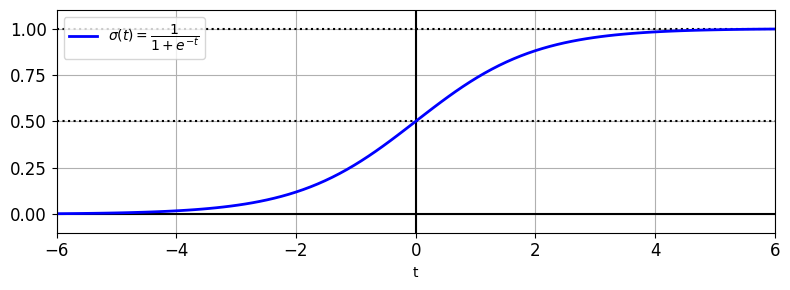

In [116]:
# extra code – for visual purpose

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

## Decision Boundaries

In [117]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [118]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [119]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [120]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int32

In [121]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Saving figure logistic_regression_plot


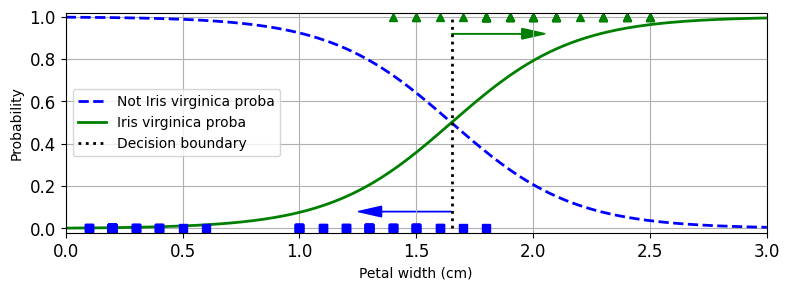

In [123]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [124]:
decision_boundary

1.6516516516516517

In [125]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## Softmax Regression

The Logistic Regression model can be generalized to support multiple
classes directly, without having to train and combine multiple binary
classifiers. This is called Softmax Regression, or
εultinomial logistic Regression.


In [126]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [127]:
softmax_reg.predict([[5, 2]])

array([2])

In [128]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

Saving figure softmax_regression_contour_plot


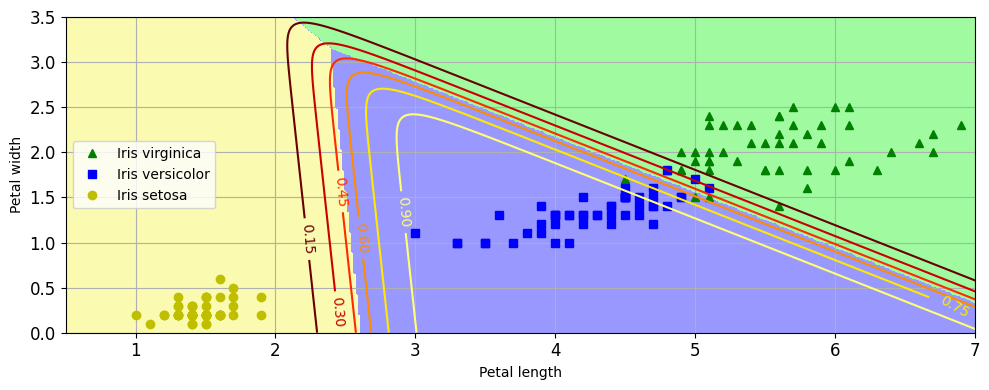

In [129]:
# extra code – for visual

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

# Lasso and Ridge Example with Data PreProcessing

## Melbourne_housing Data

Download data from 

https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv


In [155]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('C:/Users/aminur/Downloads/Melbourne_housing_FULL.csv')


In [156]:
dataset.shape

(34857, 21)

In [157]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [158]:
cols_to_use=['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']

In [159]:
dataset=dataset[cols_to_use]

In [160]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [161]:
dataset.shape

(34857, 15)

In [162]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [163]:
cols_to_fil_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']

In [164]:
dataset[cols_to_fil_zero]=dataset[cols_to_fil_zero].fillna(0)

In [165]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [166]:
dataset['Landsize']=dataset['Landsize'].fillna(dataset['Landsize'].mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())

In [167]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [168]:
dataset.dropna(inplace=True)

In [169]:
dataset=pd.get_dummies(dataset, drop_first=True) #dummy hot encoding

In [170]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [171]:
X=dataset.drop('Price', axis=1)

In [172]:
y=dataset['Price']

## Normal Linear Regression

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)


In [181]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [182]:
reg.score(X_test,y_test)

0.1385368316144978

reg.score(X_train,y_train)

## Lasso

In [183]:
lasso_reg = Lasso(max_iter=100, tol=0.1, alpha=50 )

In [184]:
lasso_reg.fit(X_train,y_train)

C:\Users\aminur\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.score(X_test,y_test)

## Ridge

In [185]:
ridge_reg = Ridge(max_iter=100, tol=0.1, alpha=50 )

In [186]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [187]:
ridge_reg.score(X_test,y_test)

0.6670848945194958